In [1]:
#preparing the data 
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
import re 
import string
import random as rnd 
import seaborn as sb 
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
import re
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.ensemble import ExtraTreesClassifier 
from datetime import datetime 
import seaborn as sns 
import plotly.graph_objs as go 
import plotly.express as px 
from plotly.subplots import make_subplots 
from collections import Counter 
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show 
from matplotlib import rcParams 
import math
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn. linear_model import Perceptron 
from sklearn.linear_model import SGDClassifier 
from sklearn.tree import DecisionTreeClassifier 
from nltk.stem import WordNetLemmatizer 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import nltk
from nltk.corpus import wordnet

In [2]:
crimes_df = pd.read_csv(r"Chicago_Crimes_2012_to_2017.csv")
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418365 entries, 0 to 1418364
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1418365 non-null  int64  
 1   ID                    1418365 non-null  int64  
 2   Case Number           1418365 non-null  object 
 3   Date                  1418365 non-null  object 
 4   Block                 1418365 non-null  object 
 5   IUCR                  1418365 non-null  object 
 6   Primary Type          1418365 non-null  object 
 7   Description           1418365 non-null  object 
 8   Location Description  1418365 non-null  object 
 9   Arrest                1418365 non-null  bool   
 10  Domestic              1418365 non-null  bool   
 11  Beat                  1418365 non-null  int64  
 12  District              1418365 non-null  float64
 13  Ward                  1418365 non-null  float64
 14  Community Area        1418365 non-

In [3]:
#printing out all the column names
print(crimes_df.columns.values)

['Unnamed: 0' 'ID' 'Case Number' 'Date' 'Block' 'IUCR' 'Primary Type'
 'Description' 'Location Description' 'Arrest' 'Domestic' 'Beat'
 'District' 'Ward' 'Community Area' 'FBI Code' 'X Coordinate'
 'Y Coordinate' 'Year' 'Updated On' 'Latitude' 'Longitude' 'Location']


In [4]:
#displaying the first five records of the dataframe
crimes_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [5]:
#displaying the last five records of the dataframe
crimes_df.tail()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1418360,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1418361,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1418362,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1418363,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"
1418364,6253474,10508692,HZ250517,05/03/2016 11:38:00 PM,001XX E 75TH ST,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,...,6.0,69.0,26,1178696.0,1855324.0,2016,05/10/2016 03:56:50 PM,41.758309,-87.620658,"(41.75830866, -87.620658418)"


In [6]:
#Displaying some basic statistical information of crimes_df 
crimes_df.describe(include=['O'])

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,FBI Code,Updated On,Location
count,1418365,1418365,1418365,1418365,1418365,1418365,1418365,1418365,1418365,1418365
unique,1418258,571105,32546,363,33,340,140,26,950,368079
top,HZ140230,01/01/2012 12:01:00 AM,001XX N STATE ST,0820,THEFT,SIMPLE,STREET,06,02/04/2016 06:33:39 AM,"(41.883500187, -87.627876698)"
freq,6,126,3567,132848,321950,147845,325084,321950,906327,2093


In [7]:
#Display basic statistical information for every column in each dataset 
crimes_df.describe(include='all')

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
count,1.418365e+06,1.418365e+06,1418365,1418365,1418365,1418365,1418365,1418365,1418365,1418365,...,1.418365e+06,1.418365e+06,1418365,1.418365e+06,1.418365e+06,1.418365e+06,1418365,1.418365e+06,1.418365e+06,1418365
unique,NaN,NaN,1418258,571105,32546,363,33,340,140,2,...,NaN,NaN,26,NaN,NaN,NaN,950,NaN,NaN,368079
top,NaN,NaN,HZ140230,01/01/2012 12:01:00 AM,001XX N STATE ST,0820,THEFT,SIMPLE,STREET,False,...,NaN,NaN,06,NaN,NaN,NaN,02/04/2016 06:33:39 AM,NaN,NaN,"(41.883500187, -87.627876698)"
freq,NaN,NaN,6,126,3567,132848,321950,147845,325084,1047308,...,NaN,NaN,321950,NaN,NaN,NaN,906327,NaN,NaN,2093
mean,3.273045e+06,9.574675e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.285474e+01,3.747455e+01,NaN,1.164399e+06,1.885510e+06,2.013851e+03,NaN,4.184144e+01,-8.767223e+01,NaN
std,1.183059e+06,8.011218e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.379378e+01,2.142995e+01,NaN,1.843389e+04,3.413940e+04,1.423228e+00,NaN,9.399956e-02,6.637181e-02,NaN
min,3.000000e+00,2.022400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,2.012000e+03,NaN,3.661945e+01,-9.168657e+01,NaN
25%,2.696813e+06,8.987180e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+01,2.300000e+01,NaN,1.152540e+06,1.858752e+06,2.013000e+03,NaN,4.176784e+01,-8.771529e+01,NaN
50%,3.052281e+06,9.575732e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.300000e+01,3.200000e+01,NaN,1.166015e+06,1.891485e+06,2.014000e+03,NaN,4.185787e+01,-8.766614e+01,NaN
75%,3.409553e+06,1.019113e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.400000e+01,5.700000e+01,NaN,1.176363e+06,1.908687e+06,2.015000e+03,NaN,4.190524e+01,-8.762812e+01,NaN


In [8]:
# displaying the information of crimes based on the crime types
# we also require this information as we are about to clean the data by removing any duplicate countries and NaN values
crimes_df.groupby(by=["Description"], dropna=False).count()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Description,,,,,,,,,,,,,,,,,,,,,
$500 AND UNDER,132848,132848,132848,132848,132848,132848,132848,132848,132848,132848,...,132848,132848,132848,132848,132848,132848,132848,132848,132848,132848
ABUSE/NEGLECT: CARE FACILITY,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
AGG CRIM SEX ABUSE FAM MEMBER,537,537,537,537,537,537,537,537,537,537,...,537,537,537,537,537,537,537,537,537,537
AGG CRIMINAL SEXUAL ABUSE,858,858,858,858,858,858,858,858,858,858,...,858,858,858,858,858,858,858,858,858,858
AGG PO HANDS ETC SERIOUS INJ,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIOLATION OF STALKING NO CONTACT ORDER,105,105,105,105,105,105,105,105,105,105,...,105,105,105,105,105,105,105,105,105,105
VIOLATION OF SUMMARY CLOSURE,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
VIOLENT OFFENDER: ANNUAL REGISTRATION,86,86,86,86,86,86,86,86,86,86,...,86,86,86,86,86,86,86,86,86,86


In [9]:
# dropping all Nan values in the dataframe
crimes_df.dropna(inplace = True)

In [10]:
# displaying the information of crimes based on the crime types that has drop the Nan values
# we also require this information to check whether we have performed data cleaning or have not
crimes_df.groupby(by=["Description"], dropna=False).count()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Description,,,,,,,,,,,,,,,,,,,,,
$500 AND UNDER,132848,132848,132848,132848,132848,132848,132848,132848,132848,132848,...,132848,132848,132848,132848,132848,132848,132848,132848,132848,132848
ABUSE/NEGLECT: CARE FACILITY,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
AGG CRIM SEX ABUSE FAM MEMBER,537,537,537,537,537,537,537,537,537,537,...,537,537,537,537,537,537,537,537,537,537
AGG CRIMINAL SEXUAL ABUSE,858,858,858,858,858,858,858,858,858,858,...,858,858,858,858,858,858,858,858,858,858
AGG PO HANDS ETC SERIOUS INJ,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIOLATION OF STALKING NO CONTACT ORDER,105,105,105,105,105,105,105,105,105,105,...,105,105,105,105,105,105,105,105,105,105
VIOLATION OF SUMMARY CLOSURE,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
VIOLENT OFFENDER: ANNUAL REGISTRATION,86,86,86,86,86,86,86,86,86,86,...,86,86,86,86,86,86,86,86,86,86


In [11]:
# Check for missing values
print("\nMissing Values in the Dataset:")
print(crimes_df.isnull().sum())


Missing Values in the Dataset:
Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64


In [12]:
# counting the records of the dataframe
# we also need this information to check whether there is a duplicate record or not
crimes_df.value_counts()

Unnamed: 0  ID        Case Number  Date                    Block                  IUCR  Primary Type        Description                     Location Description            Arrest  Domestic  Beat  District  Ward  Community Area  FBI Code  X Coordinate  Y Coordinate  Year  Updated On              Latitude   Longitude   Location                     
3           10508693  HZ250496     05/03/2016 11:40:00 PM  013XX S SAWYER AVE     0486  BATTERY             DOMESTIC BATTERY SIMPLE         APARTMENT                       True    True      1022  10.0      24.0  29.0            08B       1154907.0     1893681.0     2016  05/10/2016 03:56:50 PM  41.864073  -87.706819  (41.864073157, -87.706818608)    1
3289148     9862700   HX512386     11/18/2014 06:30:00 PM  080XX S GREEN ST       0610  BURGLARY            FORCIBLE ENTRY                  RESIDENCE-GARAGE                False   False     621   6.0       21.0  71.0            05        1172033.0     1851612.0     2014  02/04/2016 06:33:39 AM  4

In [17]:
#Count the number of general arrest rows in ascending order
crimes_df.groupby(["Arrest"]).size().reset_index(name='counts').sort_values(by=["counts"], ascending=False).head(10)

,Arrest,counts
0,False,1047308
1,True,371057


In [18]:
# diplaying some basic stats of crimes in Chicago from 2012 to 2017
print("\n\033[1mBasic Stats (Crimes in Chicago from 2012-2017)\033[0m")
print("_"*50)
print("\nCrimes Types:", crimes_df["Description"].nunique(), "unique types of crimes")
print("\nLocation:", crimes_df["Location Description"].nunique(), "unique location")


Basic Stats (Crimes in Chicago from 2012-2017)
__________________________________________________

Crimes Types: 340 unique types of crimes

Location: 140 unique location


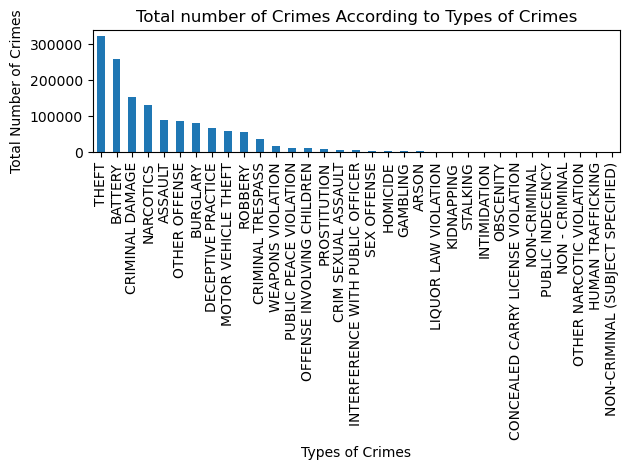

In [19]:
# visualizing and representing the 'Total number of Crimes According to Types of Crimes' in a vertical bar chart
# Plot the value counts of 'Primary Type' to find the most common crime
crimes_df['Primary Type'].value_counts().plot.bar()
plt.title("Total number of Crimes According to Types of Crimes")
plt.ylabel("Total Number of Crimes")
plt.xlabel("Types of Crimes")

# Adjust layout to prevent labels from getting cut off
plt.tight_layout()

# Show plot
plt.show()

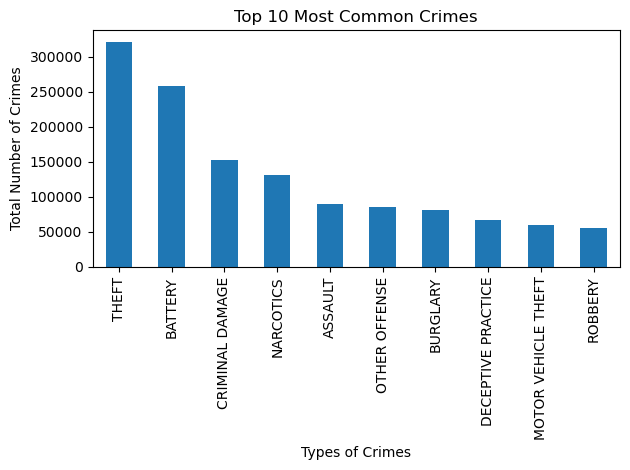

In [20]:
# Calculate the top 10 most common crimes
top_10_crimes = crimes_df['Primary Type'].value_counts().head(10)

# Plot the top 10 most common crimes
top_10_crimes.plot.bar()
plt.title("Top 10 Most Common Crimes")
plt.xlabel("Types of Crimes")
plt.ylabel("Total Number of Crimes")

# Adjust layout to prevent labels from getting cut off
plt.tight_layout()

# Show plot
plt.show()


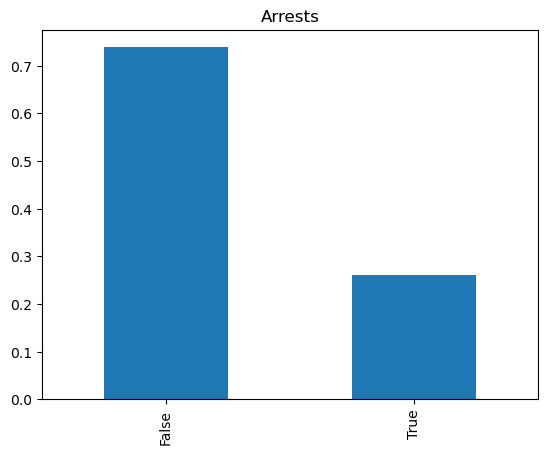

In [22]:
# Calculate the arrest success rate
arrest_success_rate = crimes_df['Arrest'].value_counts(normalize=True)

# Plot the arrest success rate
arrest_success_rate.plot.bar()
plt.title("Arrests")
plt.show()


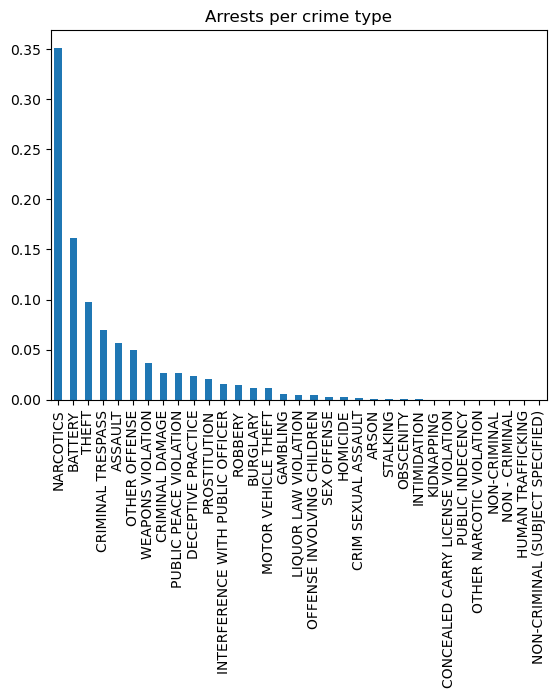

In [24]:
# Calculate the arrest rate for all types of crimes
arrest_rate_per_crime = crimes_df[crimes_df['Arrest'] == True]['Primary Type'].value_counts(normalize=True)

# Plot the arrest rate per crime type
arrest_rate_per_crime.plot.bar()
plt.title("Arrests per crime type")
plt.show()

<Figure size 1000x800 with 0 Axes>

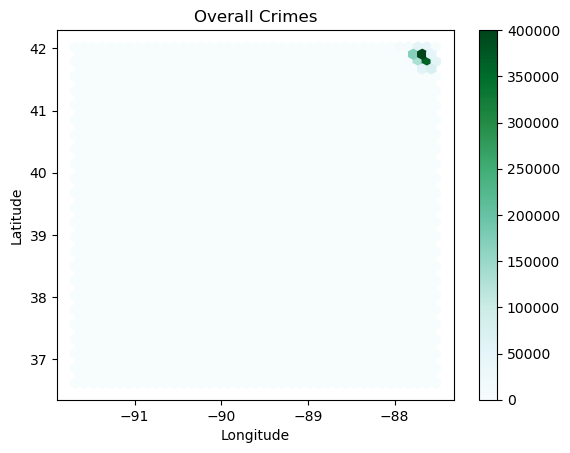

In [21]:
# To see the location of all crimes use a heatmap

# Plot hexbin for overall crimes
plt.figure(figsize=(10, 8))
crimes_df.plot.hexbin(x='Longitude', y='Latitude', gridsize=40)
plt.title("Overall Crimes")
plt.show()

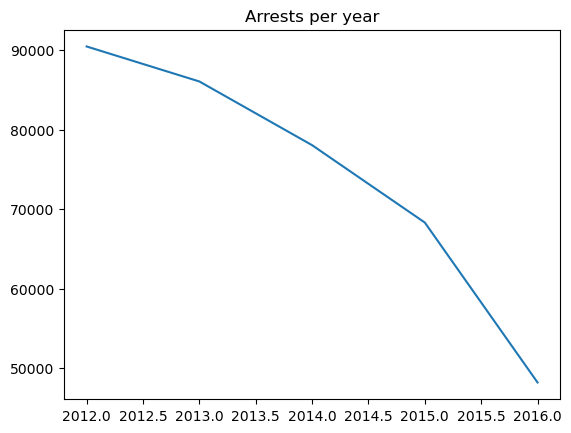

In [23]:
# Filter the DataFrame for arrests and plot the number of arrests per year
arrests_per_year = crimes_df[crimes_df['Arrest'] == True]['Year'].value_counts().sort_index()

# Plot the arrests per year
arrests_per_year.plot.line()
plt.title("Arrests per year")
plt.show()


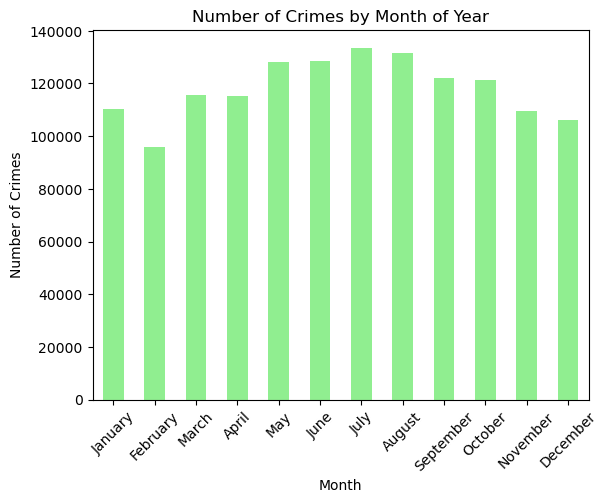

In [26]:
# Convert 'Date' column to datetime
crimes_df['Date'] = pd.to_datetime(crimes_df['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract month of the year
crimes_df['Month_of_Year'] = crimes_df['Date'].dt.month

# Define month names
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Count number of crimes by month of the year
crimes_by_month = crimes_df['Month_of_Year'].value_counts().sort_index()

# Plot the number of crimes by month of the year
crimes_by_month.plot(kind='bar', color='lightgreen')
plt.title('Number of Crimes by Month of Year')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(range(0, 12), [months[i-1] for i in range(1, 13)], rotation=45)
plt.show()

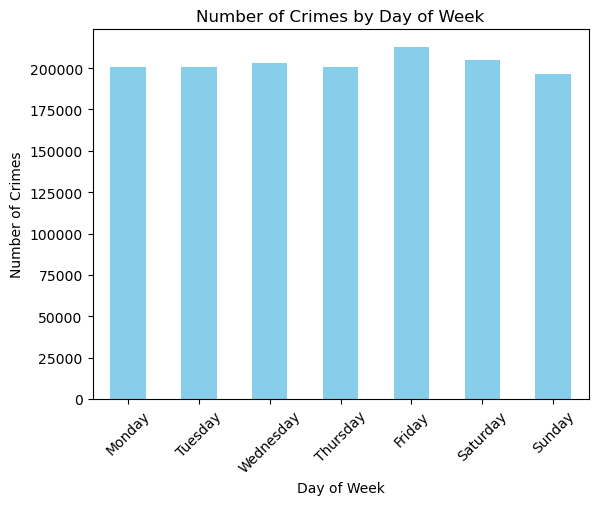

In [25]:
# Convert 'Date' column to datetime
crimes_df['Date'] = pd.to_datetime(crimes_df['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract day of the week
crimes_df['Day_of_Week'] = crimes_df['Date'].dt.dayofweek

# Define day names
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Count number of crimes by day of the week
crimes_by_day = crimes_df['Day_of_Week'].value_counts().sort_index()

# Plot the number of crimes by day of the week
crimes_by_day.plot(kind='bar', color='skyblue')
plt.title('Number of Crimes by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Crimes')
plt.xticks(crimes_by_day.index, [days[i] for i in crimes_by_day.index], rotation=45)
plt.show()

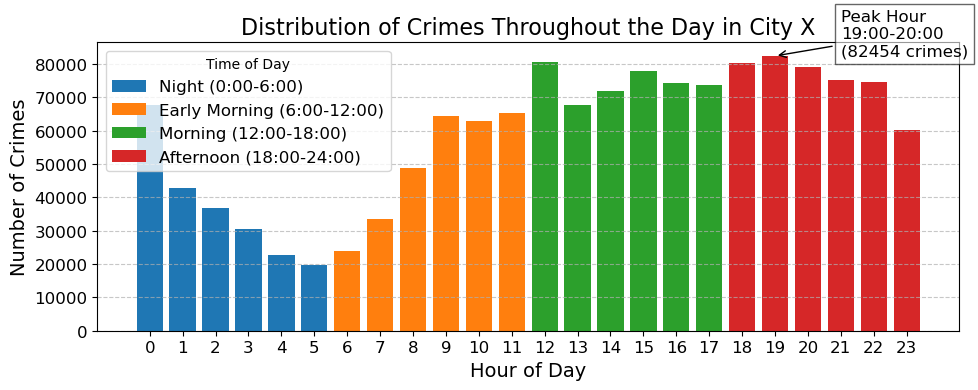

In [29]:
# Convert 'Date' column to datetime
crimes_df['Date'] = pd.to_datetime(crimes_df['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract hour of the day
crimes_df['Hour_of_Day'] = crimes_df['Date'].dt.hour

# Count number of crimes by hour of the day
crimes_by_hour = crimes_df['Hour_of_Day'].value_counts().sort_index()

# Define time of day categories
time_of_day = ['Night', 'Early Morning', 'Morning', 'Afternoon', 'Evening']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
bins = [0, 6, 12, 18, 24]

# Plot the number of crimes by hour of the day
fig, ax = plt.subplots(figsize=(10, 4))

for i in range(len(bins) - 1):
    start, end = bins[i], bins[i + 1]
    mask = (crimes_by_hour.index >= start) & (crimes_by_hour.index < end)
    ax.bar(crimes_by_hour.index[mask], crimes_by_hour[mask], color=colors[i], label=f'{time_of_day[i]} ({start}:00-{end}:00)')

# Add a more descriptive title
plt.title('Distribution of Crimes Throughout the Day in City X', fontsize=16)

# Improve axis labels for clarity
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.xticks(range(0, 24), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations to highlight peak hours
peak_hour = crimes_by_hour.idxmax()
peak_count = crimes_by_hour.max()
ax.annotate(f'Peak Hour\n{peak_hour}:00-{peak_hour + 1}:00\n({peak_count} crimes)',
            xy=(peak_hour, peak_count),
            xytext=(peak_hour + 2, peak_count + 20),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

# Add legend
plt.legend(title='Time of Day', fontsize=12)

plt.tight_layout()
plt.show()
